In [4]:
#Import required packages
import ctd
import gsw
from ctd.read import _basename
import gsw
import requests
import os
import re
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

#Set wd
os.chdir('/home/jovyan/ohw20-proj-ooi-profiles-section/ohw20-proj-ooi-profiles-section/')
os.getcwd()

'/home/jovyan/ohw20-proj-ooi-profiles-section/ohw20-proj-ooi-profiles-section'

## Read in data from 10/2019 using Stace's generated urls

In [5]:
# Provide URL to load a single file that has already been downloaded to OOI's OPENDAP server
# remember to use #fillmismatch
# Create directory that includes all urls
data_url = {}
data_url['inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
data_url['central_inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
data_url['central_offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
data_url['offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'


## Load in the bathymetric data from the shelf

In [7]:
#Load in bathymetric data
bathymetry=xr.open_dataset('data/GMRT_39-41N_70-71W.nc')


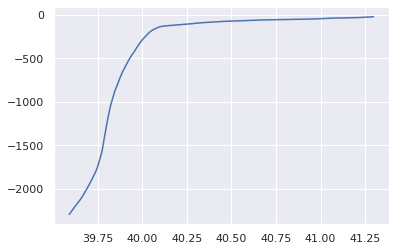

In [8]:
#Plot

#take the mean z across longitude (the moorings are essentially N-S oriented)
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)
#plt.imshow(z)
#plt.colorbar()

# #Get lat/lon range
# x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535)
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023)


#Initial plot of depth values
plt.plot(y,z)

## Taken from Kelly's code to plot a single day

In [9]:
#Extract a single time for a single day and plot all side by side
I_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
CI_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
CO_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
O_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'

In [10]:
ids = xr.open_dataset(I_URL)
cids = xr.open_dataset(CI_URL)
cods = xr.open_dataset(CO_URL)
ods = xr.open_dataset(O_URL)

In [11]:
ids = ids.swap_dims({'obs': 'time'}) #Swap dimensions
cids = cids.swap_dims({'obs': 'time'}) #Swap dimensions
cods = cods.swap_dims({'obs': 'time'}) #Swap dimensions
ods = ods.swap_dims({'obs': 'time'}) #Swap dimensions


## Select a single time slice 

In [ ]:
# select same day for each profiler
ids15=ids.sel(time="2019-10-15T03", method="nearest")
cids15=cids.sel(time="2019-10-15T03", method="nearest")
cods15=cods.sel(time="2019-10-15T03", method="nearest")
ods15=ods.sel(time="2019-10-15T03", method="nearest")
ids15

## Visualize Profile Slice with bathymetry

(500.0, 0.0)

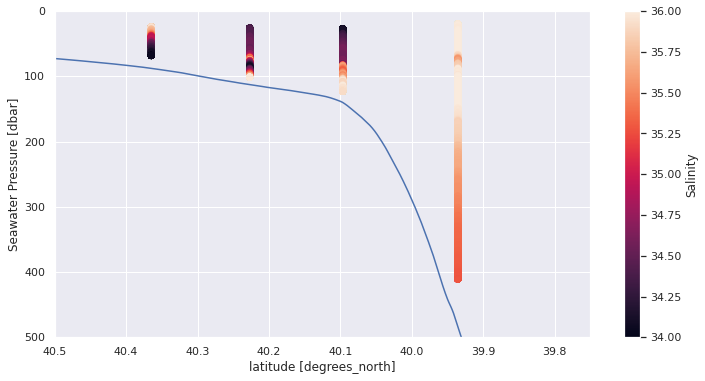

In [171]:
#Visualize
figsize=(12, 6)
fig, ax= plt.subplots(figsize=figsize)

cci=ids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=ids15.practical_salinity.data, vmin=34.0,vmax=36.0)


ccci=cids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=cids15.practical_salinity.data, vmin=34.0,vmax=36.0)


ccco=cods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=cods15.practical_salinity.data, vmin=34.0,vmax=36.0)

cco=ods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=ods15.practical_salinity.data, vmin=34.0,vmax=36.0)

cco.set_clim(34.0,36.0)

#Add colorbar
plt.colorbar(cco,label='Salinity',cmap='hot')


######### =======  Bathymetry
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)

# #Get lattitude range
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023)


#Convert to z to p
p=gsw.p_from_z(z,y)

# #PLot bathymetry line
plt.plot(y,p)

#Flip x and y axes
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlim(40.5,39.75)
plt.ylim(500,0)


## Ultimate Goal
Write a function that takes in a dataframe with nx4xt observations, where 
n=maximum number of depth points
4=number of mooring profilers
t=number of time steps observed





ValueError: x and y must have same first dimension, but have shapes (1023,) and (535,)

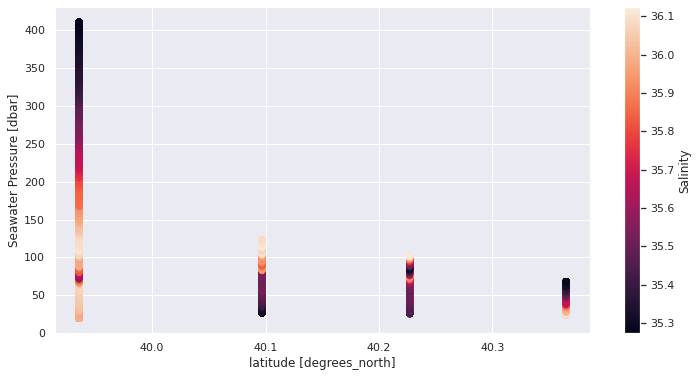

In [114]:
#Bathymetry
bathymetry=xr.open_dataset('GMRT_39-41N_70-71W.nc')
bath_df=bathymetry.to_dataframe

#Plot
z=bathymetry.z.values.reshape([535,1023]).mean(axis=1)

#Get x range
x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535)
y=np.linspace(bathymetry.y_range[0],bathymetry.y_range[1],1023)

#gsw.p_from_z()

#PLot

plt.plot(y,-z)
plt.xlim(39.8,40.5)
plt.ylim(500,0)